## Proyecto 1 – Predecir la calidad del vino
- Angie Carolina Quintana Guerrero
- Juan Pablo Marín

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
base_datos = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

Para dar respuesta, empezaremos a hacer un análisis exploratorio de las variables...

In [3]:
base_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No es necesario hacer tratamiento de nulos, puesto que no hay.

In [4]:
base_datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
base_datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


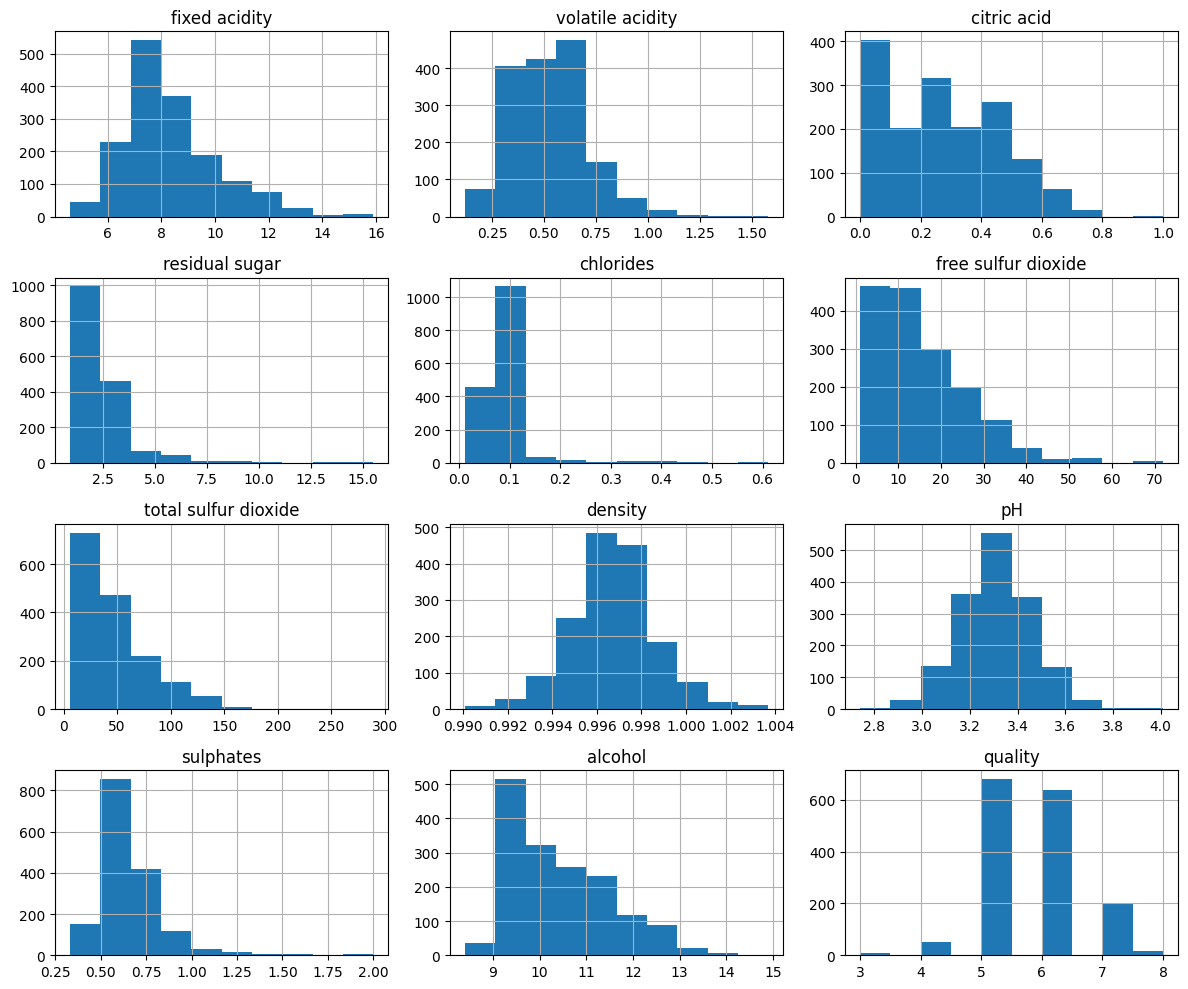

In [6]:
base_datos.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

De las variables, a través de los histogramas podemos ver que la densidad y el PH se comportan realativamente normal, las demás variables tienen otros tipos de distribuciones

<Axes: >

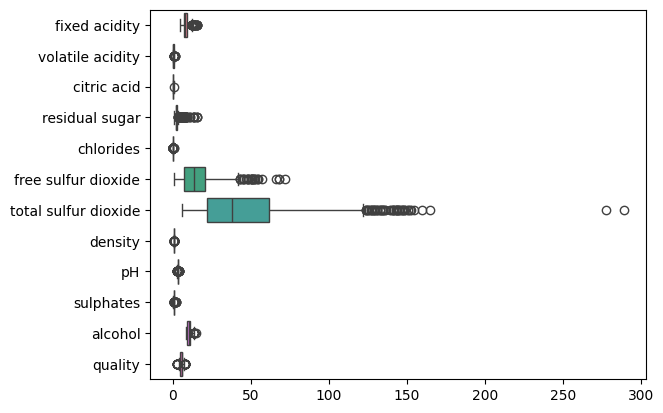

In [7]:
sns.boxplot(data=base_datos, orient='h')

In [8]:
matriz_correlacion = base_datos.corr()
matriz_correlacion

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


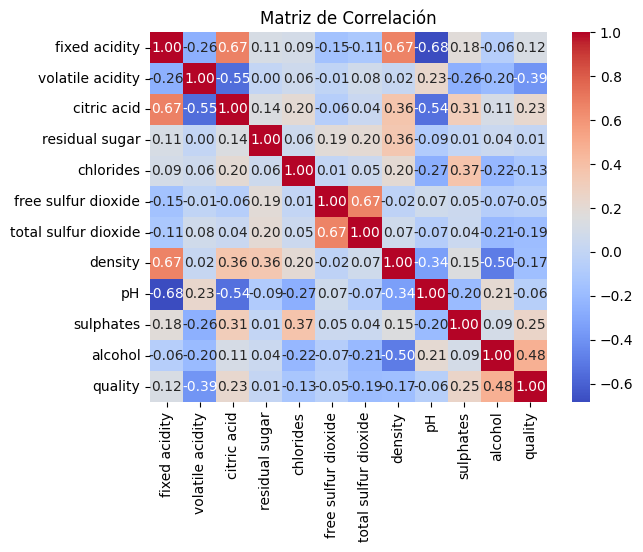

In [9]:
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [10]:
base_datos.corr()['quality'].sort_values()[::-1]

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Ahora, se identifican las variables predictoras y la variable objetivo

In [11]:
X = base_datos.drop('quality', axis=1)  # Características
y = base_datos['quality']  # Variable objetivo

División de los datos en conjuntos de entrenamiento y prueba

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamiento del modelo de regresión lineal

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluación del modelo

In [14]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación utilizando métricas como el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

# Evaluación utilizando el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio: 0.3900251439639542
Coeficiente de determinación (R²): 0.403180341279623


Reentrenamiento del modelo con los datos escalados

In [15]:
# Inicializar y entrenar el modelo de regresión logística
model_reentrenado = LinearRegression()
model_reentrenado.fit(X, y)

# Predecir en el conjunto de prueba
y_pred_reentrenado = model_reentrenado.predict(X_test)

# Evaluación utilizando métricas como el error cuadrático medio
mse_reentrenado = mean_squared_error(y_test, y_pred_reentrenado)
print("Error cuadrático medio:", mse_reentrenado)

# Evaluación utilizando el coeficiente de determinación (R²)
r2_reentrenado = r2_score(y_test, y_pred_reentrenado)
print("Coeficiente de determinación (R²):", r2_reentrenado)


Error cuadrático medio: 0.3847488464753442
Coeficiente de determinación (R²): 0.4112541747623957


Conclusiones:

El modelo de regresión lineal da valores de mse y r2 por debajo de 0.5, indicando que el modelo no explica mucha variabilidad en los datos, esto también se identifica en las matrices de correlación de la variables 'quality' con las demás, puesto que ninguna correlación es lo suficientemne fuerte para  dar explicaciones. Por lo anterior, el modelo tiene una precisión deficiente.

Al reentrenar el modelo no se evidencian diferencias significativas.

Regresión Logística

In [16]:
# Crear la variable objetivo 'categorical_quality'
base_datos['categorical_quality'] = base_datos['quality'].apply(lambda x: 'Bueno' if x >= 6 else 'Regular')

# Verificar los primeros registros para asegurarse de que la variable se haya creado correctamente
print(base_datos[['quality', 'categorical_quality']].head())

   quality categorical_quality
0        5             Regular
1        5             Regular
2        5             Regular
3        6               Bueno
4        5             Regular


In [17]:
# Codificar la variable categórica 'categorical_quality' en valores numéricos
label_encoder = LabelEncoder()
base_datos['categorical_quality_encoded'] = label_encoder.fit_transform(base_datos['categorical_quality'])

# Dividir los datos en características (X) y variable objetivo (y)
X = base_datos.drop(['quality', 'categorical_quality', 'categorical_quality_encoded'], axis=1)  # Características
y = base_datos['categorical_quality_encoded']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar la regresión logística con la base de entrenamiento
logistic_regression = LogisticRegression(max_iter=1000)  # Incrementar el número máximo de iteraciones si es necesario
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Predicciones en la base de prueba
y_pred = logistic_regression.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Confusion Matrix:
[[130  49]
 [ 34 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       179
           1       0.69      0.76      0.72       141

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



Con un 'accuracy' del 74% y los f1-score al orden del 76% para 'Regular' y 72% para 'Bueno' permiten indicar que el modelo de Regresión Logística tiene un rendimiento aceptable en su precisión.

Los modelos desarrollados buscan relacionar e iterar las variables para determinar la calidad del vino, ninguna correlación entre las variables es lo suficientemente fuerte como para generar peso en los modelos, esta ambigüedad y falencia no permite identificar caracteristicas que hagan la calidad del vino buena o regular; agregar la variable 'categorical_quality' determina y clasifica los vinos, por lo anterior y por los resultados de evaluación (precisión) se define que el modelo de Regresión Logística tiene un mejor rendimiento.
